#ライブラリの用意

In [1]:
!pip install janome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 52.5 MB/s eta 0:00:00


In [2]:
import janome
import re
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
class config:
    input_path = '/content/drive/MyDrive/3年/自然言語処理/レポート/cls-acl10-unprocessed/jp/books/'

#前処理

In [4]:
t = Tokenizer()
vectorizer = CountVectorizer(token_pattern='(?u)\\b\\w+\\b') #日本語対応

In [5]:
def get_tokenized_sentences_and_labels(file_name: str):
    #データの読み込み
    with open(file_name) as f:
        data = f.read()
        data = data.replace('\n', '').replace('\r', '')
    
    reviews = re.findall(pattern=r'<item>(.+?)</item>',string=data) #ratingはあるのにtextがない感想を取り除く

    tokenized_sentences = []
    labels = []

    for item in reviews:
        raiting = re.findall(pattern=r'<rating>(.+?)</rating>',string=item)
        text = re.findall(pattern=r'<text>(.+?)</text>',string=item)
        if raiting and text:
            #textがある感想のみ採用
            words = [token for token in t.tokenize(text[0], wakati=True)] #tokenごとに分解
            a_tokenized_sentence=" ".join(words) #スペース区切りで結合
            tokenized_sentences.append(a_tokenized_sentence)
            raiting = int(float(raiting[0])) #5段階の評価を取得
            label = 0 if raiting >= 3 else 1 #positive -> 0, negative -> 1
            labels.append(label)
 
    return tokenized_sentences, labels

In [6]:
def make_sample_vectors(train_file_name: str, test_file_name: str):
    train_tokenized_sentences, train_y = get_tokenized_sentences_and_labels(train_file_name)
    train_X = vectorizer.fit_transform(train_tokenized_sentences)

    test_tokenized_sentences, test_y = get_tokenized_sentences_and_labels(test_file_name)
    test_X = vectorizer.transform(test_tokenized_sentences)

    return train_X, train_y, test_X, test_y

#データ読み込み

In [7]:
train_X, train_y, test_X, test_y = make_sample_vectors(config.input_path + 'train.review', config.input_path + 'test.review')

In [8]:
print(len(train_X.toarray()))
print(len(train_y))
print(len(test_X.toarray()))
print(len(test_y))

2000
2000
1999
1999


#学習

In [15]:
from sklearn.naive_bayes import BernoulliNB
cl = BernoulliNB(alpha=0.6)
cl.fit(train_X, train_y)

BernoulliNB(alpha=0.6)

In [16]:
cl.score(test_X, test_y)

0.7288644322161081

In [17]:
pred = cl.predict(test_X)

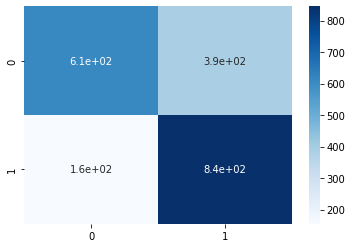

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_y, pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.savefig('/content/drive/MyDrive/3年/自然言語処理/レポート/NV_cm.png')